In [1]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install kmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [3]:
import kmapper as km
from kmapper.jupyter import display
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')
df1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [97]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')

var1='Malic_Acid'
var2='Hue'
df = pd.concat([df1[var1] , df1[var2]], axis=1)

df

,Malic_Acid,Hue
0,1.71,1.04
1,1.78,1.05
2,2.36,1.03
3,1.95,0.86
4,2.59,1.04
...,...,...
173,5.65,0.64
174,3.91,0.70
175,4.28,0.59
176,2.59,0.60


Veamos la información básica de la base de datos de aquellos valores no categóricos.

In [98]:
data = df.to_numpy()
data

array([[1.71 , 1.04 ],
       [1.78 , 1.05 ],
       [2.36 , 1.03 ],
       [1.95 , 0.86 ],
       [2.59 , 1.04 ],
       [1.76 , 1.05 ],
       [1.87 , 1.02 ],
       [2.15 , 1.06 ],
       [1.64 , 1.08 ],
       [1.35 , 1.01 ],
       [2.16 , 1.25 ],
       [1.48 , 1.17 ],
       [1.73 , 1.15 ],
       [1.73 , 1.25 ],
       [1.87 , 1.2  ],
       [1.81 , 1.28 ],
       [1.92 , 1.07 ],
       [1.57 , 1.13 ],
       [1.59 , 1.23 ],
       [3.1  , 0.96 ],
       [1.63 , 1.09 ],
       [3.8  , 1.03 ],
       [1.86 , 1.11 ],
       [1.6  , 1.09 ],
       [1.81 , 1.12 ],
       [2.05 , 1.13 ],
       [1.77 , 0.92 ],
       [1.72 , 1.02 ],
       [1.9  , 1.25 ],
       [1.68 , 1.04 ],
       [1.5  , 1.19 ],
       [1.66 , 1.09 ],
       [1.83 , 1.23 ],
       [1.53 , 1.25 ],
       [1.8  , 1.1  ],
       [1.81 , 1.04 ],
       [1.64 , 1.09 ],
       [1.65 , 1.12 ],
       [1.5  , 1.18 ],
       [3.99 , 0.89 ],
       [1.71 , 0.95 ],
       [3.84 , 0.91 ],
       [1.89 , 0.88 ],
       [3.9

In [99]:
mean_other_score=(data[:,1])

In [100]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data, projection=[0] )


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [101]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [102]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (178, 2) using lens shaped (178, 1)

Creating 4 hypercubes.

Created 5 edges and 16 nodes in 0:00:00.012826.


In [103]:
G['meta_data']

{'projection': '[0]',
 'n_cubes': 4,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=4)',
 'scaler': 'MinMaxScaler()'}

In [104]:
mapper.visualize(G,
                title='Gráfico de clusters',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_other_score,
                color_function_name = 'Variables',

                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("level_education_math" + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


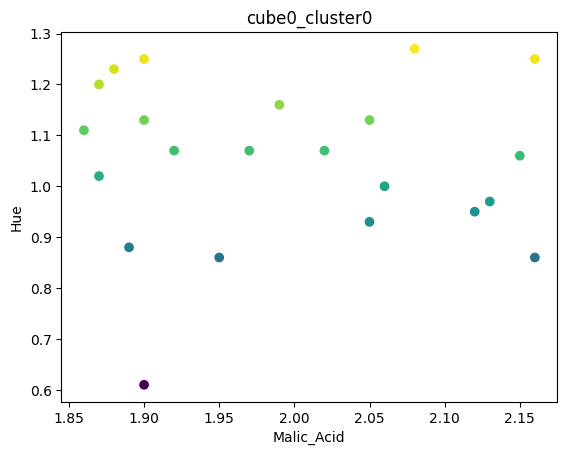

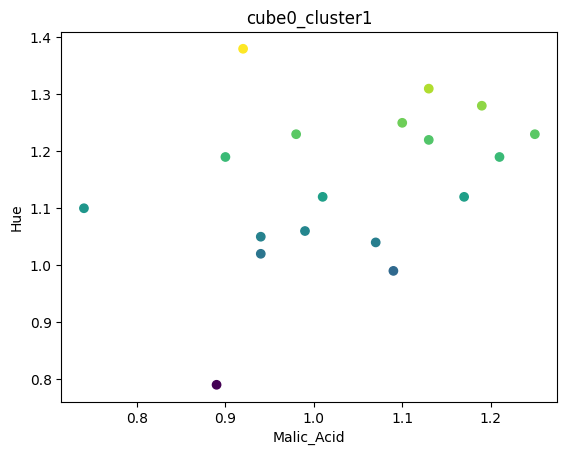

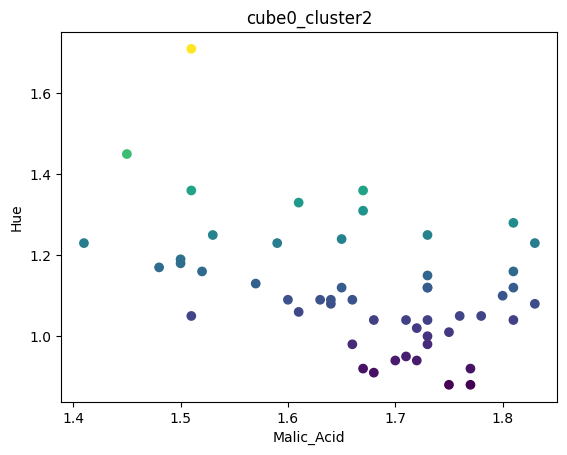

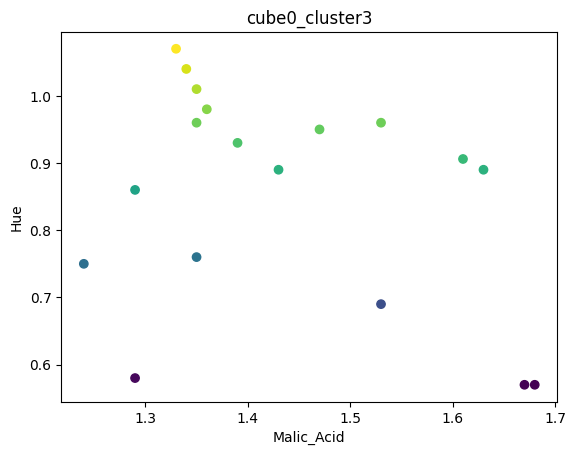

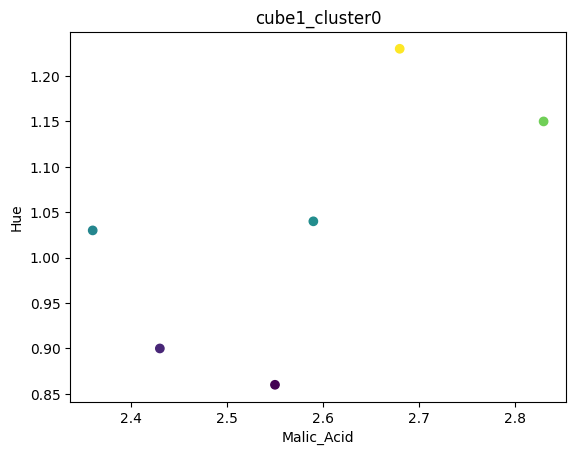

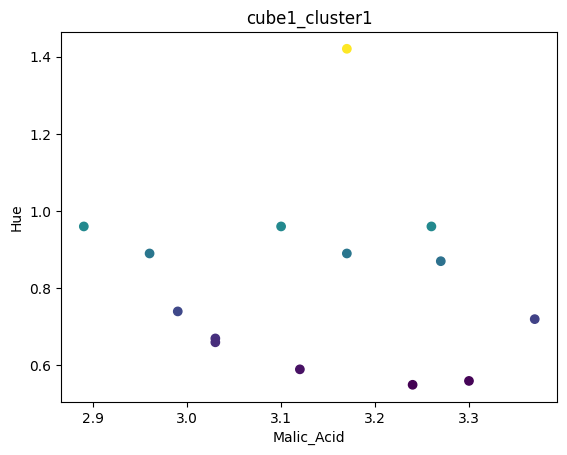

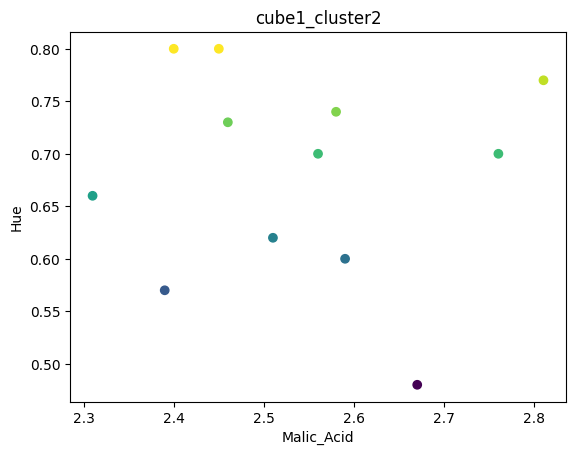

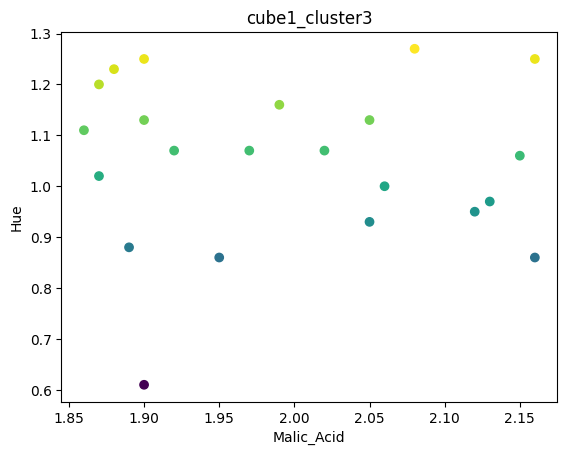

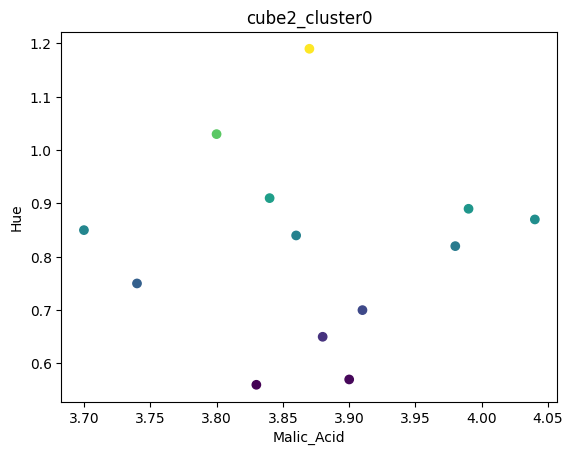

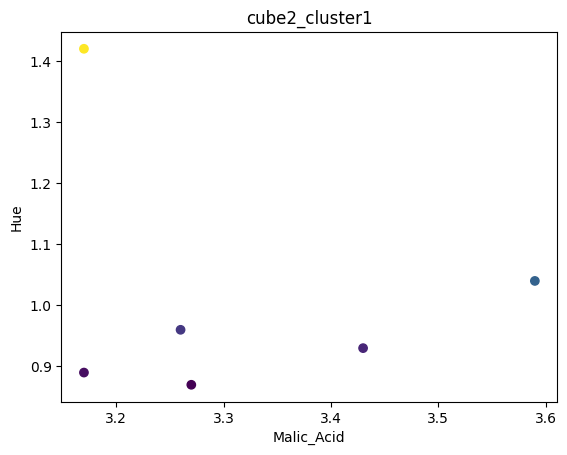

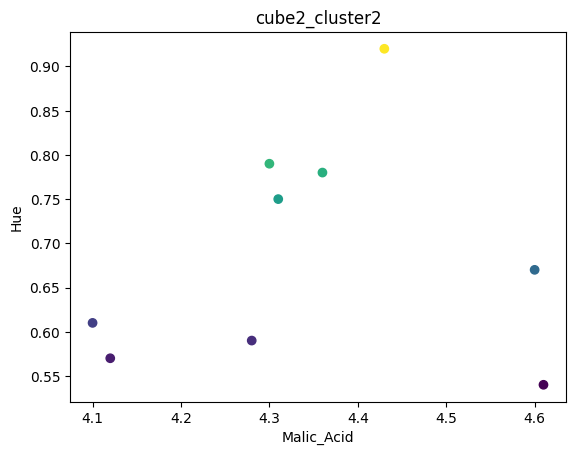

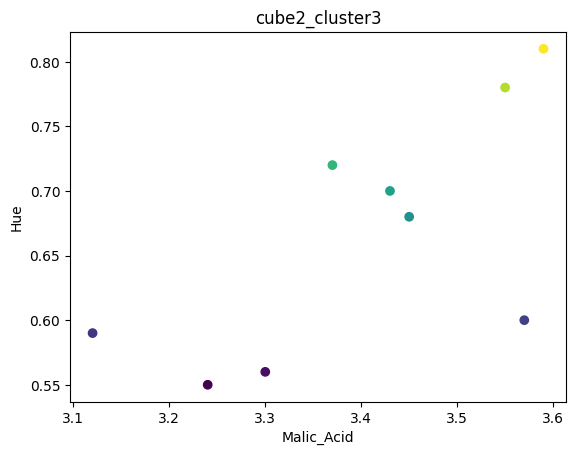

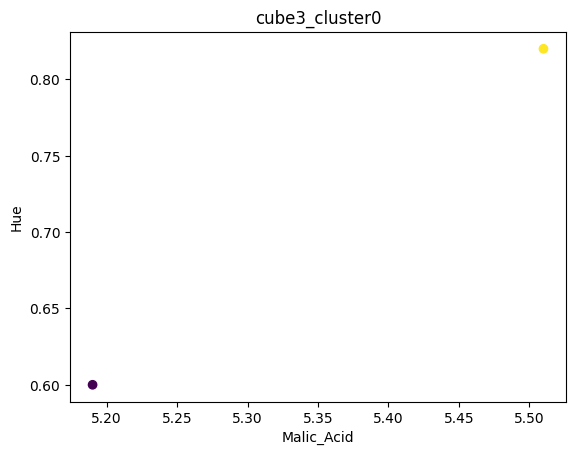

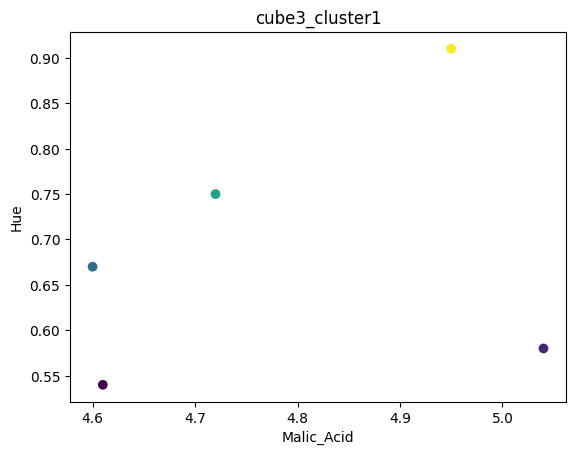

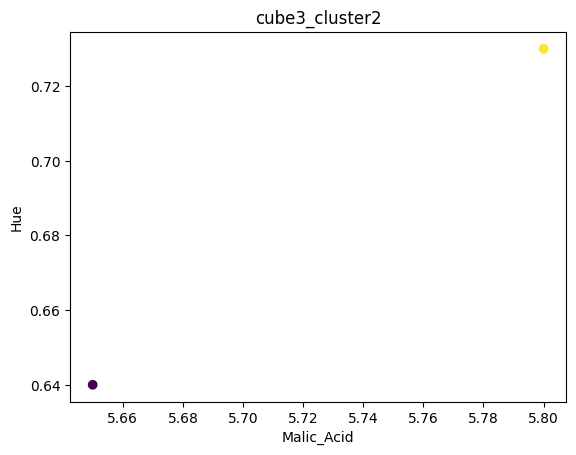

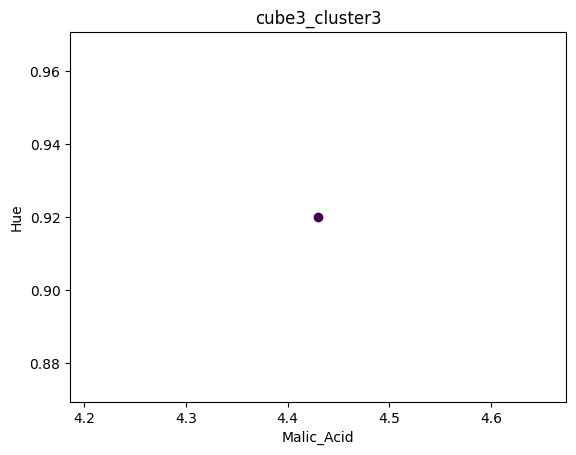

In [105]:
import matplotlib.pyplot as plt

# Obtener la lista de todos los nodos en el grafo G
nodos = list(G['nodes'].keys())

# Iterar sobre todos los nodos
for nodo in nodos:
    mvstwo_cube3c1 = df1.iloc[G['nodes'][nodo], :]
    x = mvstwo_cube3c1[var1]
    y = mean_other_score[G['nodes'][nodo]]

    # Crear el gráfico de dispersión
    scatter = plt.scatter(x=x, y=y, c=y, cmap='viridis')

    # Configurar título y ejes
    plt.title(nodo)
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Mostrar el gráfico
    plt.show()
